In [1]:
import json
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')
palette = sns.color_palette('coolwarm')

In [3]:
with open('posts.json', 'r') as file:
    data = json.load(file)

In [4]:
len(data)

474

In [5]:
data[1]

{'BAInfo': '',
 'adAuthorization': False,
 'adLabelVersion': 0,
 'aigcLabelType': 0,
 'author': {'avatarLarger': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_1080x1080.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=omCo2%2BVJVIRzPFySiaQ96FX5nMc%3D',
  'avatarMedium': 'https://p77-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_720x720.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=mz4du%2BPqkniQn%2FRWQhL7yyeCKlA%3D',
  'avatarThumb': 'https://p77-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7310710960996483118~c5_100x100.jpeg?lk3s=a5d48078&x-expires=1713178800&x-signature=yLbkMhWH1FGuTsoWj7aHiUTDnT4%3D',
  'commentSetting': 0,
  'downloadSetting': 0,
  'duetSetting': 0,
  'ftc': False,
  'id': '6734083000290722821',
  'isADVirtual': False,
  'isEmbedBanned': False,
  'nickname': 'marissa ren',
  'openFavorite': False,
  'privateAccount': False,
  'relation': 0,
  'secUid': 'MS4wLjABAAAAS7wgMAQ1Q91-SqvywvB65aOP9j56-8BMme7pN_qn3a2R

In [6]:
post_list = []

In [7]:
def extract_hashtags(record):
    hashtags = []
    for content in record['contents']:
        for text_extra in content['textExtra']:
            hashtags.append(text_extra['hashtagName'])
    return hashtags

In [8]:
def extract_location(record):
    location = []
    if 'poi' in record:
        poi = record['poi']
        name = poi.get('name')
        if name:
            location.append(name)
    return location

In [9]:
for record in data:
    id = record['id']
    user_name = record['author']['nickname']
    author = record['authorStats']
    author_follower = author['followerCount']
    author_heart = author['heart']
    desc = record['desc']
    challenge = record['challenges']
    cha_desc = challenge[0]['desc']
    stats = record['statsV2']
    comments = stats['commentCount']
    digg = stats['diggCount']
    view = stats['playCount']
    share = stats['shareCount']
    collect = stats['collectCount']
    posttime = record['createTime']
    all_hashtags = extract_hashtags(record)
    location = extract_location(record)

    post_list.append(
        {'id':id,
         'user_name':user_name,
        'author_follower':author_follower,
        'author_heart':author_heart,
        'posttime':posttime,
        'location':location,
        'view':view,
        'collect':collect,
        'share':share,
        'digg':digg,
        'comments':comments,
        'desc':desc,
        'cha_desc':cha_desc,
        'all_hashtags':all_hashtags}
    )

df = pd.DataFrame(post_list)


In [10]:
df.head(20)

,id,user_name,author_follower,author_heart,posttime,location,view,collect,share,digg,comments,desc,cha_desc,all_hashtags
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,1705335339,[],17444557,177617,11690,2207386,8115,This client’s colour analysis update raises so...,,"[carolbrailey, colouranalysis, coloranalysis, ..."
1,7309534985084521759,marissa ren,2400000,87600000,1701883746,[Seoul],15775359,130404,9207,1905913,3221,very fun but humbling experience lol #personal...,,"[personalcoloranalysis, coloranalysis, korea]"
2,7190844699408698667,Rosa,25900,2100000,1674249012,[],9174808,174663,54000,1483705,3330,me the entire video🤨 #fyp #korea #personalcolo...,,"[fyp, korea, personalcoloranalysis, southkorea..."
3,7130674894198623534,khadija 🍉,4076,1900000,1660239629,[],12565693,36630,1075,1469326,1008,When I realized I bought two blue tops the day...,,"[personalcolor, colortest, personalcoloranalys..."
4,7164035101205040430,shu ☁️,9355,1700000,1668006917,[],13440706,42784,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,,"[personalcoloranalysis, personalcolor, persona..."
5,7228231085077908754,Molita Lin,64800,2900000,1682953700,[],9304393,135619,12573,1014673,1721,Finally i tried the personal color test & body...,,"[personalcolor, personalcoloranalysis, bodytyp..."
6,7064232817164602630,Julia Dobkine|Agile Styling,202800,5100000,1644769874,[],7584594,15672,824,881272,945,#personalcolor #personalcoloranalysis #colourc...,,"[personalcolor, personalcoloranalysis, colourc..."
7,7351867077415865646,Fashion Finds and Fits,22500,2000000,1711739975,[],18499755,276554,32432,742171,36275,Use the app WhatColors to find all of this out...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcolor, personalcoloran..."
8,7329912922581257504,★,11900,1900000,1706628352,[],6197404,185526,3816,712768,14447,#fyp #foryou #colorpalette #fypシ #undertone #w...,,"[fyp, foryou, colorpalette, fypシ, undertone, w..."
9,7130656073572306222,nvemaa,5784,1700000,1660235247,[],6887743,10044,314,683663,975,ignore my rbf #personalcolor #personalcolorana...,,"[personalcolor, personalcoloranalysis, persona..."


In [11]:
print(df.dtypes)

id                 object
user_name          object
author_follower     int64
author_heart        int64
posttime            int64
location           object
view               object
collect            object
share              object
digg               object
comments           object
desc               object
cha_desc           object
all_hashtags       object
dtype: object


In [12]:
df['post_date']=df['posttime'].apply(lambda x: datetime.fromtimestamp(x))
df.pop('posttime')

0      1705335339
1      1701883746
2      1674249012
3      1660239629
4      1668006917
          ...    
469    1667536565
470    1710332080
471    1712548430
472    1675692635
473    1706026523
Name: posttime, Length: 474, dtype: int64

In [24]:
int_list = ['id','view','share','comments','digg','collect']
str_list = ['user_name','desc','cha_desc'] 

for attr in int_list:
    df[attr] = df[attr].astype(int)

for re in str_list:
    df[re] = df[re].astype('string')

df

,id,user_name,author_follower,author_heart,location,view,collect,share,digg,comments,desc,cha_desc,all_hashtags,post_date
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,[],17444557,177617,11690,2207386,8115,This client’s colour analysis update raises so...,,"[carolbrailey, colouranalysis, coloranalysis, ...",2024-01-15 17:15:39
1,7309534985084521759,marissa ren,2400000,87600000,[Seoul],15775359,130404,9207,1905913,3221,very fun but humbling experience lol #personal...,,"[personalcoloranalysis, coloranalysis, korea]",2023-12-06 18:29:06
2,7190844699408698667,Rosa,25900,2100000,[],9174808,174663,54000,1483705,3330,me the entire video🤨 #fyp #korea #personalcolo...,,"[fyp, korea, personalcoloranalysis, southkorea...",2023-01-20 22:10:12
3,7130674894198623534,khadija 🍉,4076,1900000,[],12565693,36630,1075,1469326,1008,When I realized I bought two blue tops the day...,,"[personalcolor, colortest, personalcoloranalys...",2022-08-11 19:40:29
4,7164035101205040430,shu ☁️,9355,1700000,[],13440706,42784,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,,"[personalcoloranalysis, personalcolor, persona...",2022-11-09 16:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,7162014867740806402,Liana | Color Analysis+Styling,56800,6500000,[],147250,1427,149,3489,51,"Knowing your best colors, prints, accessories,...",,"[fashiontrends, coloranalysis, personalcoloran...",2022-11-04 05:36:05
470,7345820336610397446,Bella ♡,180300,9100000,[],47933,73,6,3037,44,personal color analysis helps too! #personalco...,,"[personalcoloranalysis, makeup]",2024-03-13 13:14:40
471,7355339480686955782,Wibwub.home.studio,223,4175,[],77928,1613,873,3012,10,เติมความรักให้ตัวเองผ่านศาสตร์ personal color ...,,"[bloomingyoursoul, personalcolor, personalcolo...",2024-04-08 05:53:50
472,7197045049178213637,Carol Brailey|Color Analysis🎨,323700,6800000,[],90393,256,50,3269,91,Colour Analysis Storytime: Featuring a Bright ...,,"[@Carol Brailey|Color Analysis🎨 , carolbrailey...",2023-02-06 15:10:35


In [25]:
print(df.dtypes)

id                          int64
user_name                  string
author_follower             int64
author_heart                int64
location                   object
view                        int64
collect                     int64
share                       int64
digg                        int64
comments                    int64
desc                       string
cha_desc                   string
all_hashtags               object
post_date          datetime64[ns]
dtype: object


In [26]:
sorted_df = df.sort_values(by='view', ascending=False)
sorted_df

,id,user_name,author_follower,author_heart,location,view,collect,share,digg,comments,desc,cha_desc,all_hashtags,post_date
7,7351867077415865646,Fashion Finds and Fits,22500,2000000,[],18499755,276554,32432,742171,36275,Use the app WhatColors to find all of this out...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcolor, personalcoloran...",2024-03-29 20:19:35
0,7324359490361412869,Carol Brailey|Color Analysis🎨,323700,6800000,[],17444557,177617,11690,2207386,8115,This client’s colour analysis update raises so...,,"[carolbrailey, colouranalysis, coloranalysis, ...",2024-01-15 17:15:39
1,7309534985084521759,marissa ren,2400000,87600000,[Seoul],15775359,130404,9207,1905913,3221,very fun but humbling experience lol #personal...,,"[personalcoloranalysis, coloranalysis, korea]",2023-12-06 18:29:06
14,7290200166274026758,moon | saekjo studios,19400,1400000,[Surabaya],14531479,14012,822,392602,752,"dalam lubuk hati, client ini tau yang bagus ad...",,"[personalcolor, personal, color, personalcolor...",2023-10-15 17:00:00
4,7164035101205040430,shu ☁️,9355,1700000,[],13440706,42784,3235,1202012,1387,I'm still in denial 🥲 #personalcoloranalysis #...,,"[personalcoloranalysis, personalcolor, persona...",2022-11-09 16:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,7224381173982612762,Peony Style,88800,2400000,[],32348,1062,52,3631,9,WHAT COLOR YOU WEAR MEANS ? 🌸🌈 #personalstylei...,,"[personalstyleinspo, personalcoloranalysis, be...",2023-04-21 08:08:50
458,7241808673683672325,Peony Style,88800,2400000,[],32002,1332,91,3150,17,YOUR OUTFIT CAN EFFECT YOUR MOOD 🤓😆😂 #personal...,,"[personalstyleinspo, personalcoloranalysis, pe...",2023-06-07 07:16:20
464,7229915554813857051,Peony Style,88800,2400000,[],29899,996,55,3087,20,GET READY IN UNDER 5 MINUTES! 🌸🌷💗#personalstyl...,,"[personalstyleinspo, personalcoloranalysis, pe...",2023-05-06 06:05:01
457,7192980570660457733,Monica | armocromia e ugc 🦄🦋,7912,816500,[],27337,97,9,3159,15,Voi l’avevate notato? 😌#armocromia#blairwaldor...,,"[armocromia, blairwaldorf, personalcoloranalys...",2023-01-26 16:18:20


In [27]:
sorted_date_df = df.sort_values(by='post_date')
sorted_date_df

,id,user_name,author_follower,author_heart,location,view,collect,share,digg,comments,desc,cha_desc,all_hashtags,post_date
53,6885327644208942342,theoutfitcurator,65800,1900000,[],1017748,3686,1101,107863,499,@reneferret Personal Color Analysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,"[, coloranalysis, personalcoloranalysis, miami...",2020-10-19 15:49:25
217,6903639521028574469,theoutfitcurator,65800,1900000,[],210697,168,57,15592,97,So happy to be coloring lives around the world...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, colors, personalcoloranalysis,...",2020-12-07 23:07:47
131,6949303743963761926,samantha rae,568,56800,[],294783,2440,684,42215,137,Cannot recommend PCA enough. @colorpolitan is ...,,"[, fyp, foryou, personalcoloranalysis, coloran...",2021-04-10 01:27:47
82,6974909805689425158,theoutfitcurator,65800,1900000,[],1167933,1666,299,75014,463,#AprendeConTikTok #personalcoloranalysis #colo...,¡Pásatelo bien aprendiendo cosas nuevas! ¿Cien...,"[aprendecontiktok, personalcoloranalysis, colo...",2021-06-18 01:32:23
463,6991488189366078725,theoutfitcurator,65800,1900000,[],317368,328,139,5241,75,DM for more info about appointments in Boston ...,,"[boston, nyc, newyork, coloranalysis, personal...",2021-08-01 17:44:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,7354039741592948000,✨️Konsty✨️,6652,265000,[],249558,2108,913,21355,198,Έκανα το προσωπικό μου color analysis στην Κορ...,,"[konsty, coloranalysis, coloranalysistok, colo...",2024-04-04 17:50:14
471,7355339480686955782,Wibwub.home.studio,223,4175,[],77928,1613,873,3012,10,เติมความรักให้ตัวเองผ่านศาสตร์ personal color ...,,"[bloomingyoursoul, personalcolor, personalcolo...",2024-04-08 05:53:50
386,7355395514206080262,Jessica Harviali,1800000,57500000,[],38362,220,6,5051,34,Hasilnya yang sangat tidak diduga 🫣 nanti aku...,,"[personalcoloranalysis, gayaditiktok]",2024-04-08 09:31:17
124,7355474649096015110,meisya on the internet,2090,316400,[Bandung City],427384,4912,1244,44654,252,GIRL GETS PERSONAL COLOR ANALYSIS THINKING HER...,,"[personalcolor, personalcoloranalysis, colorse...",2024-04-08 14:38:21


In [28]:
sorted_date_df[sorted_date_df['cha_desc'].str.contains('new')]

,id,user_name,author_follower,author_heart,location,view,collect,share,digg,comments,desc,cha_desc,all_hashtags,post_date
53,6885327644208942342,theoutfitcurator,65800,1900000,[],1017748,3686,1101,107863,499,@reneferret Personal Color Analysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,"[, coloranalysis, personalcoloranalysis, miami...",2020-10-19 15:49:25
217,6903639521028574469,theoutfitcurator,65800,1900000,[],210697,168,57,15592,97,So happy to be coloring lives around the world...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, colors, personalcoloranalysis,...",2020-12-07 23:07:47
317,7069881581132844293,Curate Your Style,138000,4100000,[],161530,465,33,7319,35,Reply to @kizoomtite #coloranalysis #colourana...,Try our new #ColorAnalysis effect and share yo...,"[, coloranalysis, colouranalysistok, springpal...",2022-02-28 22:51:20
202,7077775033761926426,Sangrawee Mitprasert,17600,596600,[],808470,96,81,18647,117,PC สี Sfe Zone ที่ผู้ชายส่วนใหญ่ชอบใส่ คิดว่าร...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcoloranalysis, วิเคราะ...",2022-03-22 05:21:57
21,7085431169617071402,gracemchoi,299400,3900000,[],4301052,46123,8726,284362,2833,#coloranalysis #coloranalysistok #colorseasons...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, coloranalysistok, colorseasons...",2022-04-11 21:31:41
395,7085495916467195179,dianne 💫,756,85700,[],93049,724,102,4699,98,Help someone tell me #coloranalysis #coloranal...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, coloranalysistok, colorseasons...",2022-04-12 01:42:57
370,7087466995855215918,Ash,4120,269100,[],206972,618,113,5383,183,New version of the filter!!! Much easier to se...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcoloranalysis, persona...",2022-04-17 09:11:44
127,7101393646075022638,saks,175900,9200000,[],301521,5467,217,42912,101,never doing the undertone vein test again lmao...,Try our new #ColorAnalysis effect and share yo...,"[, coloranalysis, personalcolor, personalcolor...",2022-05-24 21:54:14
340,7105794210011286789,Karolína,68100,2600000,[],84351,302,1,6286,59,No a teď babo raď 😅🧐🤔🤭🫣 #coloranalysis #person...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcolor, personalcoloran...",2022-06-05 18:30:41
341,7118846510015466757,Curate Your Style,138000,4100000,[],616814,317,33,6239,8640,Let us know your thoughts! #coloranalysis #per...,Try our new #ColorAnalysis effect and share yo...,"[coloranalysis, personalcoloranalysis, coloura...",2022-07-10 22:40:18


In [29]:
plot_df_count = df.groupby(df['post_date'].dt.year).agg(
    post_count=('post_date', 'size'),
    view_count=('view', 'sum'),
    collect_count=('collect','sum'),
    comments_count=('comments', 'sum'),
    share_count=('share', 'sum'),
    digg_count=('digg', 'sum')
).reset_index()

plot_df_count.rename(columns={'post_date': 'year'}, inplace=True)

In [30]:
plot_df_count

,year,post_count,view_count,collect_count,comments_count,share_count,digg_count
0,2020,2,1228445,3854,596,1158,123455
1,2021,4,2279523,5181,892,2185,152666
2,2022,94,106680878,438285,49875,40700,9225472
3,2023,289,233222758,2518254,60047,290392,17410302
4,2024,85,97042277,1233486,95358,94920,6545666


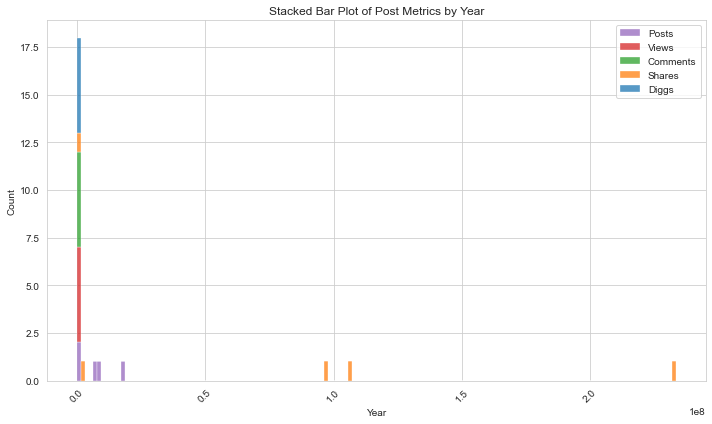

In [31]:
# 绘制堆积的条形图
plt.figure(figsize=(10, 6))
sns.histplot(data=plot_df_count[['post_count','view_count','comments_count','share_count','digg_count']], multiple="stack")

# 添加图例
plt.legend(labels=['Posts', 'Views', 'Comments', 'Shares', 'Diggs'])

# 添加标题和标签
plt.title('Stacked Bar Plot of Post Metrics by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 显示图形
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
from collections import Counter

allhashtags = []

for hashtags_list in df['all_hashtags']:
    allhashtags.extend(hashtags_list)

hashtags_counter = Counter(allhashtags)
hashtags_dict = dict(hashtags_counter)

hashtags_freq = pd.DataFrame(list(hashtags_dict.items()), columns=['Hashtag', 'Frequency'])
hashtags_freq = hashtags_freq.sort_values(by='Frequency', ascending=False)
hashtags_freq

,Hashtag,Frequency
9,personalcoloranalysis,479
22,personalcolor,268
2,coloranalysis,165
21,,130
30,personalcolortest,81
4,coloranalysistok,68
5,undertone,64
16,fyp,61
26,kbeauty,60
1,colouranalysis,58
